# Getting started

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import pyobs
import numpy

pyobs.set_verbose('mfit') # prints additional information
pyobs.set_verbose('diff') # prints additional information

We create synthetic data from a model distribution that we try to fit using py3obs.

The model function is a simple polynomial $f = p_0 + p_1 x$

In [3]:
# true parameters
P1 = [2.3, 4.5]

The utility function `diff` provides automatically first and second derivatives, and is based on symbolic differentiation

In [4]:
xax1=[1,2,3,4,5,6,7,8]
[f1, df1, _] = pyobs.diff('p0 + p1*x','x','p0,p1')

Now let's generate synthetic autocorrelated data without correlations, ie all points are uncorrelated: we do so by passing a `cov` matrix which is simply a vector. The function `acrandn` interprets it as a diagonal covariance matrix.

In [5]:
# generate autocorrelated data
N=500 # number of configs

# central values
mu=[f1(x,P1[0],P1[1]) for x in xax1]

# diagonal cov matrix
cov=[(mu[i]*0.2)**2 for i in range(len(mu))]

# autocorrelation time
tau=4.0

data = pyobs.random.acrandn(mu,cov,tau,N)
data = numpy.reshape(data,numpy.size(data),)

In [6]:
yobs1 = pyobs.obs(desc='test-data')
yobs1.create('A',data,dims=(len(mu),))
print(yobs1)

6.76(17)	11.39(35)	16.23(39)	20.61(43)	23.36(48)	28.27(71)	34.94(75)	38.30(97)



<IPython.core.display.Javascript object>


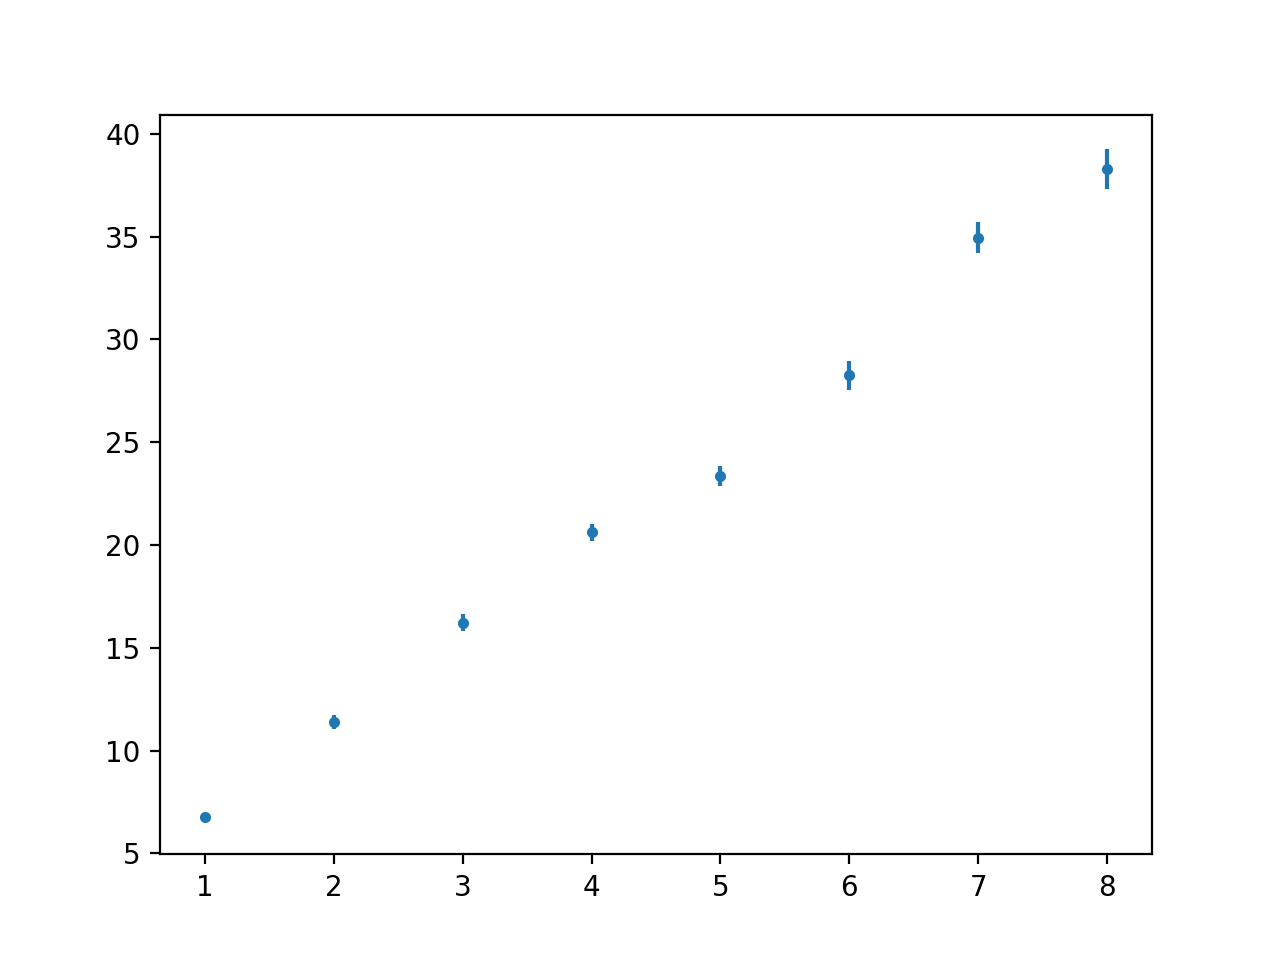

<ErrorbarContainer object of 3 artists>

In [7]:
plt.figure()
[y,dy] = yobs1.error()
plt.errorbar(xax1,y,dy,fmt='.')

Now we create one instance of the `mfit` class. We need the kinematic coordinates `xax1`, the function and its derivatives obtained from `diff`, and the metric of the $\chi^2$, the matrix $W$, which is taken to be the inverse covariance matrix for a proper statistical interpretation of the $\chi^2$. In this case, since we have uncorrelated data points, we only needs their errors.

In [8]:
[y,dy] = yobs1.error()
W=1./dy**2
fit1 = pyobs.mfit(xax1,W,f1,df1)

The minimization of the $\chi^2$ is performed by simply calling the `mfit` class with the corresponding observable as argument. The output is new observable with the fit parameters.

In [9]:
pars = fit1(yobs1)
print('fit1 = ', pars)
print('Ratio with true parameters:',pars/numpy.array(P1))

chisquare = 15.059102449603337
minimizer iterations = 3
minimizer status: Levenberg-Marquardt: reached  1.0e-08 per-cent tolerance on x0
mfit.run executed in 0.00159621 secs
fit1 =  2.36(23)	4.458(80)

Ratio with true parameters: 1.024(99)	0.991(18)



Using the fit parameters we can evaluate the fit function at arbitrary coordinates and check its compatibility with
the original data points, or extrapolate values from it.

<IPython.core.display.Javascript object>


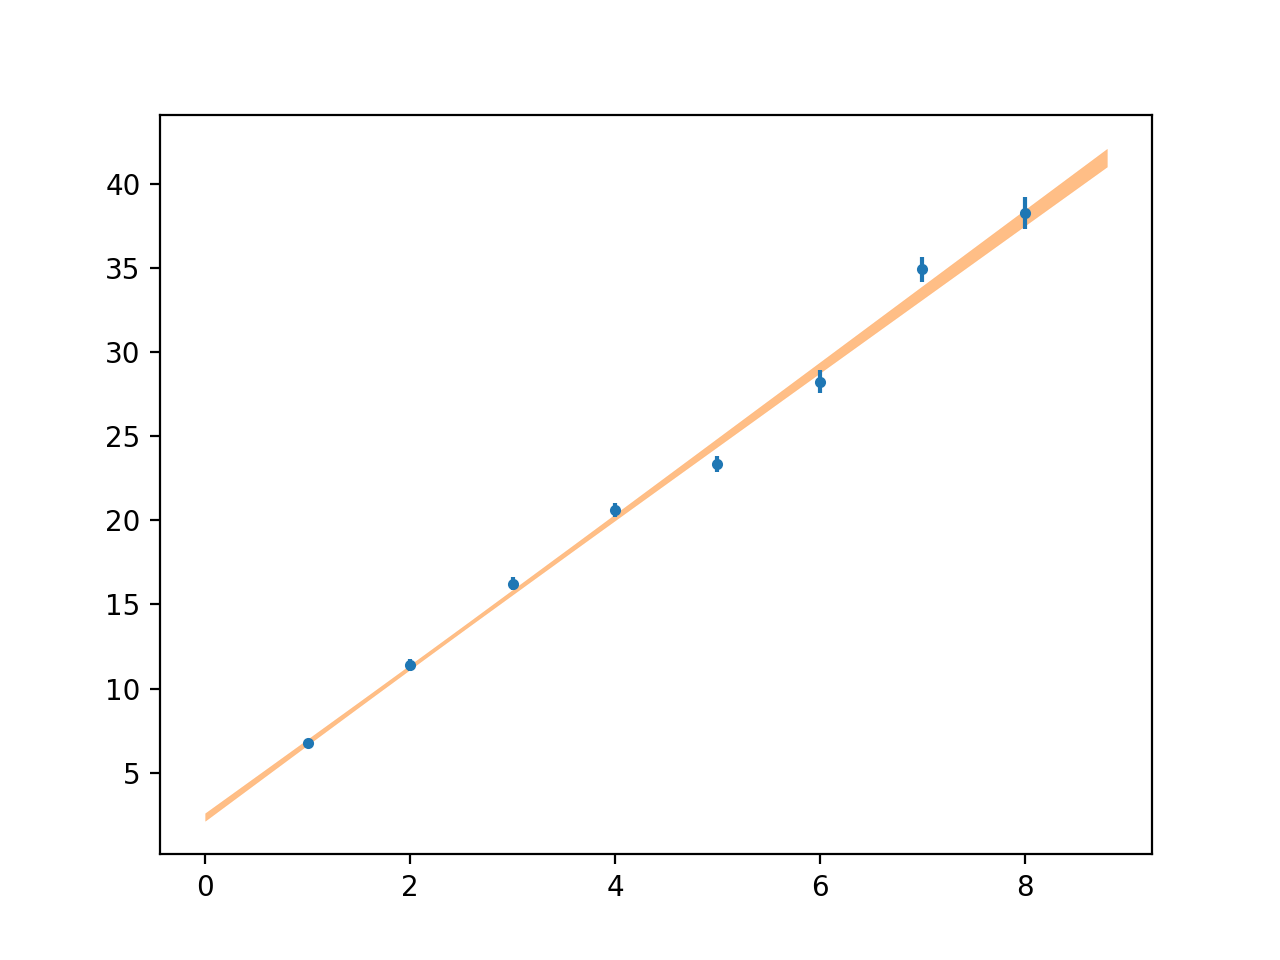

extrapolated value at 1.0 =  6.81(17)



In [10]:
plt.figure()
[y,dy] = yobs1.error()
plt.errorbar(xax1,y,dy,fmt='.',color='C0')

xax=numpy.arange(0,9,0.2)
[yeval] = fit1.eval(xax,pars)
[y,dy] = yeval.error()
plt.fill_between(xax,y+dy,y-dy,lw=0.1,alpha=0.5,color='C1')

[yzero] = fit1.eval(numpy.array([1.0]), pars)
print('extrapolated value at 1.0 = ', yzero)